# Retail Data Analytics of Store Sales

Name : Raguath Gunasekaran

## Introduction

Retail Data Analytics is important process of analyzing data to make important decisions which help to improve the sales, customer satisfaction, quality.  

Retail Data Analytics helps to supply chain and inventory management such as how many products left, stock details etc.  

Benefits of Retail data analytics [ Source – Ref 3]  

Customer satisfaction 

Customer retention  

Effective Operative procedures for inventory and labor [ Source - Ref 4] 

In the recent competition, The Owner of Shop should study the behavior of customers buying pattern. In that way we can advertise and improve the needs for better sales and customer service. 

In this project, I am focused on predicting the sales of shop and departments in future based on the forecasting and performance of sales. Also, especially important correlation between sales and Department, temperature, Holidays, and other parameters. 

Without predictive model, the only way to be sure to reach all of them is to reach every single customer. Instead of that, we can build accurate predictive model and we can target much more effective way. 

The below are the reasons I have selected Python Language to perform this project. 

Python as a programming language has numerous uses such as Machine Learning, AI, mobile applications, statistical , etc. As we know, AI, machine learning, and data analysis/analytics is where it has amassed most of its popularity.  

 

Python contains more libraries and packages is continually being employed which helped to solve complex industry issues, data-driven strategies, risk analysis etc. Python contains more libraries and packages is continually being employed which helped to solve complex industry issues, data-driven strategies, risk analysis etc. 

## Business Understanding: Defining the Problem

The business objective remained the same: The main goal of the project is to build a predictive model to predict or determine the sales of the shops and Department and then share the recommendation to improve Sales. Also, to identify the correlation between sales and Department, temperature, Holidays, and other parameters. I am planning to use different classification machine learning other classification models such as SVM, Logistic Regression and Time Series Forecasting's identify the Ensemble Classifier had the best accuracy.  

## Data Understanding

The format of the dataset for this case study is CSV. The data contains below variables. 

Data used in this project are online product reviews collected from Kaggle.com ( Women’s Clothing E-Commerce dataset ) 

https://www.kaggle.com/manjeetsingh/retaildataset 

Tools and Library to be used in this Project 

Pandas library used to load the data from csv to Dataframe. 

Seaborn and matplotlib are used for data visualization. 

Sklearn library used for model and data preparation. 


#### Tools and Library to be used in this Project

Python

Pandas library

scikit-learn library

Matplot Library

nltk Library

Jupyter Notebook as an IDE.


## Data Preparation
Based on the reading, “data scientists usually spend 70% of the project time here, preprocessing and exploring the data”. So, the Data Preparation is important for predictive analytics project. In this project, we need to make sure the data is suitable and well prepared for model. While preparing the Data, we need to verify the metadata of the given dataset and need to understand very clearly about data patterns, relationships etc

As part of suggestion from Professor, I am adding more detail on this.

Review Text is going to be predictor variable and Review Text is the text collected from customers. 

Recommended will be used as target variable and Recommended is collected from customer which defines the product 1 is recommended, 0 is not recommended

Based on the Rating, Review and Recommended, I am going to create one Sentiment Classifier which provides good or bad Review.

As part of Text Processing, I am planning to use ‘CountVectorizer’ from the scikit-learn and CountVectorizer develops a vector of all the words in the Review Text. Then apply  Logistic Regression ( binary classification ), SVM, Random Forest, Naive Bayes and other Algorithms to find the high accurate model.

Also based on the Reivew text, we find the most common used words for positive and most common words for Negative.

### Importing packages and loading data

In [5]:
pip install yellowbrick

     |████████████████████████████████| 271 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 57.5 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
    Uninstalling numpy-1.20.2:
      Successfully uninstalled numpy-1.20.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
# data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import yellowbrick
from yellowbrick.features import Rank2D

from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guida

ModuleNotFoundError: No module named 'yellowbrick'

In [4]:
StoreData_df = pd.read_csv('stores data-set.csv', header=0,index_col=0)
SalesData_df = pd.read_csv('sales data-set.csv', header=0,index_col=0)
FeaturesData_df = pd.read_csv('Features data set.csv', header=0,index_col=0)

StoreData_df.head()
SalesData_df.head()
FeaturesData_df.head()

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Store,,,,,,,,,,,
1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


####  Metadata of the Dataframe

In [7]:
StoreData_df.info()
SalesData_df.info()
FeaturesData_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    45 non-null     object
 1   Size    45 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 1 to 45
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Dept          421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 1 to 45
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          8190 non-null   object 
 1   Temperature   8190 non-

In [8]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ")
FeaturesData_df.shape

The dimension of the table is: 


(8190, 11)

## EDA - Exploratory data analysis

#### Summarized Data

In [9]:
print("Describe Data")
print(FeaturesData_df.describe())
print("Summarized Data")
print(FeaturesData_df.describe(include=['O']))

Describe Data
       Temperature   Fuel_Price      MarkDown1      MarkDown2      MarkDown3  \
count  8190.000000  8190.000000    4032.000000    2921.000000    3613.000000   
mean     59.356198     3.405992    7032.371786    3384.176594    1760.100180   
std      18.678607     0.431337    9262.747448    8793.583016   11276.462208   
min      -7.290000     2.472000   -2781.450000    -265.760000    -179.260000   
25%      45.902500     3.041000    1577.532500      68.880000       6.600000   
50%      60.710000     3.513000    4743.580000     364.570000      36.260000   
75%      73.880000     3.743000    8923.310000    2153.350000     163.150000   
max     101.950000     4.468000  103184.980000  104519.540000  149483.310000   

          MarkDown4      MarkDown5          CPI  Unemployment  
count   3464.000000    4050.000000  7605.000000   7605.000000  
mean    3292.935886    4132.216422   172.460809      7.826821  
std     6792.329861   13086.690278    39.738346      1.877259  
min      

####  Checking Nulls and Renaming the column names

In [10]:
FeaturesData_df.isnull().sum()

Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

####  identify the Correlation between Variables

In [11]:
FeaturesData_df.corr()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Temperature,1.000000,0.101354,-0.124979,-0.321888,-0.077552,-0.064194,-0.003241,0.164426,0.150890,-0.161906
Fuel_Price,0.101354,1.000000,0.066122,-0.193461,-0.057168,-0.008546,-0.021926,-0.186696,-0.033360,-0.078238
MarkDown1,-0.124979,0.066122,1.000000,0.021289,-0.089841,0.810455,0.085967,-0.044327,0.020501,0.152621
MarkDown2,-0.321888,-0.193461,0.021289,1.000000,-0.053555,-0.046595,-0.008166,-0.044896,-0.001692,0.299448
MarkDown3,-0.077552,-0.057168,-0.089841,-0.053555,1.000000,-0.062785,-0.016026,-0.020166,-0.003464,0.445224
MarkDown4,-0.064194,-0.008546,0.810455,-0.046595,-0.062785,1.000000,0.042952,-0.053868,0.021905,0.134841
MarkDown5,-0.003241,-0.021926,0.085967,-0.008166,-0.016026,0.042952,1.000000,0.001526,0.031847,-0.024630
CPI,0.164426,-0.186696,-0.044327,-0.044896,-0.020166,-0.053868,0.001526,1.000000,-0.303110,0.001008
Unemployment,0.150890,-0.033360,0.020501,-0.001692,-0.003464,0.021905,0.031847,-0.303110,1.000000,-0.002644
IsHoliday,-0.161906,-0.078238,0.152621,0.299448,0.445224,0.134841,-0.024630,0.001008,-0.002644,1.000000


### Remove Unwanted Columns

In [18]:
FeaturesData_df.drop(columns=['CPI'])

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,IsHoliday,Type_x,Size_x,Type_y,Size_y,Type_x,Size_x,Type_y,Size_y
Store,,,,,,,,,,,,,,,,,,
1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,A,151315,A,151315,A,151315,A,151315
1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,A,151315,A,151315,A,151315,A,151315
1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,A,151315,A,151315,A,151315,A,151315
1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,A,151315,A,151315,A,151315,A,151315
1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,A,151315,A,151315,A,151315,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000,False,B,118221,B,118221,B,118221,B,118221
45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000,False,B,118221,B,118221,B,118221,B,118221
45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000,False,B,118221,B,118221,B,118221,B,118221


###  Handling Missing Values

In [21]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return FeaturesData_df.fillna('NoValue', inplace=inplace)

fill_na_most(FeaturesData_df['MarkDown1'])
fill_na_most(FeaturesData_df['MarkDown2'])
fill_na_most(FeaturesData_df['MarkDown3'])
fill_na_most(FeaturesData_df['MarkDown4'])
fill_na_most(FeaturesData_df['MarkDown5'])


In [22]:
FeaturesData_df.isna().sum()

Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type_x          0
Size_x          0
Type_y          0
Size_y          0
Type_x          0
Size_x          0
Type_y          0
Size_y          0
dtype: int64

In [22]:
FeaturesData_df.isna().sum()

Clothing ID                0
Age                        0
Title                      0
Review                     0
Rating                     0
Recommended                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [23]:
FeaturesData_df.isnull().sum()

Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type_x          0
Size_x          0
Type_y          0
Size_y          0
Type_x          0
Size_x          0
Type_y          0
Size_y          0
dtype: int64

In [24]:
FeaturesData_df.dropna(inplace = True)

In [25]:
len(FeaturesData_df)

23486

In [30]:
SalesData_df

,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,
1,1,05/02/2010,24924.50,False
1,1,12/02/2010,46039.49,True
1,1,19/02/2010,41595.55,False
1,1,26/02/2010,19403.54,False
1,1,05/03/2010,21827.90,False
...,...,...,...,...
45,98,28/09/2012,508.37,False
45,98,05/10/2012,628.10,False
45,98,12/10/2012,1061.02,False


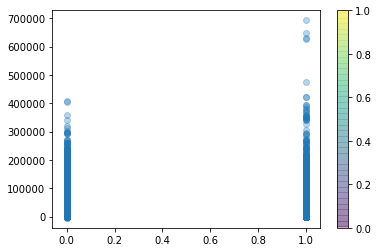

In [34]:
x = SalesData_df['IsHoliday']
y = SalesData_df['Weekly_Sales']


plt.scatter(x, y,  alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

In [ ]:
import matplotlib.pyplot as plt
x = SalesData_df['Dept']
y = SalesData_df['Weekly_Sales']

plt.bar(x, y, color ='maroon',
        width = 0.4)

plt.show()

### Text preprocessing
The below are steps we need to follow for the text preprocessing through Natural Language Tool Kit (NLTK)

Lowercase

Removing Punctuation

Tokenization

Stopword Filtering

Stemming

#### Model Developement

In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train_vectorized, y_train)
ytest = np.array(y_test)
predictions = model.predict(vect.transform(X_test))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [ ]:
print('The Accuracy of the Model is %s' % accuracy_score(predictions, y_test))
print(' The Classification Report of Accuracy Model as below')
print(classification_report(ytest, predictions))

The Accuracy of the Model is 0.889724666477434
 The Classification Report of Accuracy Model as below
              precision    recall  f1-score   support

           0       0.73      0.60      0.66      1240
           1       0.92      0.95      0.93      5806

    accuracy                           0.89      7046
   macro avg       0.82      0.77      0.80      7046
weighted avg       0.88      0.89      0.89      7046



In [127]:
# Building a logistic regression model
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Compute and print the confusion matrix 
print(' The confusion_matrix of Accuracy Model as below')
print(confusion_matrix(y_test, predictions))


 The confusion_matrix of Accuracy Model as below
[[ 740  500]
 [ 277 5529]]
